## Logistic Regression

#### Algorithm Overview
- Logistic regression is a supervised machine learning algorithm that is mainly used for classification
- It is referred to as regression because it takes the output of the linear regression function as an input and uses a sigmoid function to estimate the probability for the given class 
- There are three main types of logistic regression - Binomal (two categories), multinomial (three categories) and ordinal (more than three categories)
- A linear regression ouput is the any continous value whil the logistic regression will output a probability that an instance belongs to a given class or not. Another difference is that in logistic regression, instead of fitting a regression line, we fit an 'S' shaped function - the sigmoid function
- Typically the threshold is set at 0.5 for binary problems

##### Sigmoid Function (or logistic function)
- The sigmoid function is a mathematical function used to map the predicted values (between 0 and 1) into probabilities

![Sigmoid function, (or logistic function)](image-1.png)

##### Further Information
- https://www.geeksforgeeks.org/understanding-logistic-regression/#
- https://www.ibm.com/topics/logistic-regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Store data as dataframe and display the head (from data stored in file)
column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
                'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order',
                'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report',
                'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
                'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
                'word_freq_hp', 'word_freq_hpl', 'word_freq_george','word_freq_650', 'word_freq_lab', 'word_freq_labs',
                 'word_freq_telnet','word_freq_857', 'word_freq_data', 'word_freq_415','word_freq_85','word_freq_technology',
                'word_freq_1999', 'word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting',
                'word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference',
                
                'char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#',
                
                'capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam'
                ]

filepath = '/Users/ejallen/Desktop/Machine_Learning_Project/02_Data/spambase/spambase.data'
df_spam = pd.read_csv(filepath, header=None, names=column_names)

display(df_spam.head())

df_spam.shape

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


(4601, 58)

In [3]:
# split the data into training and testing
x = df_spam.drop('spam', axis=1)
y = df_spam.iloc[:,-1].to_numpy().ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Logistic Regression Algorithm Overview:

Firstly we make the following assumptions 
1. The dependent variable is categorical in nature
2. The independent variable is not multi-collinearity (multi-collinearity refers to when two or more independent variables are highly correlated)

**Rough Steps:**

1. *Logistic / Sigmoid Function* - this function will map any real-valued number into a probabilty 

$ \sigma(z) = \frac{1}{1 + e^{-z}} $

2. *Cost Function* - this function will quantify how well the model is performing

$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right) $

3. *Gradient Descent* - to update the weights and intercepts in the direction that minimises the cost function

$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x_j^{(i)} $

After these steps the model should be tested 

Note in this file, the above steps are all completed using the sklearn library

Further Resources:
- In class coding, week three
- https://web.stanford.edu/~jurafsky/slp3/5.pdf

#### Pipelines

A pipeline is a way to streamline a lot of the routine processes in a machine learning workflow. 

- *Documentation* - https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- *Example with PCA and logistic regression* - https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html

#### K Fold Validation

we split our x_train into k different folds to train the data and repeat the training K times

In [4]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
k = 0
best_score = 0  

# Convert x_train and y_train to numpy arrays
X_train_val = np.array(x_train)
y_train_val = np.array(y_train)

# Loop over sections of data
for idx_train, idx_val in kf.split(X_train_val):
    X_train_k, X_val = X_train_val[idx_train], X_train_val[idx_val]
    y_train_k, y_val = y_train_val[idx_train], y_train_val[idx_val]

    # Use the pipeline to train a new model
    logistic = LogisticRegression(max_iter=150, 
                                  tol=0.1, 
                                  random_state=42,
                                  class_weight={0:0.4,1:0.6},
                                  penalty='l2',
                                  solver='newton-cg'
                                  )
    
    pipe = Pipeline([('scaler', StandardScaler()), ('logistic', logistic)])
    pipe.fit(X_train_k, y_train_k)
    y_pred_lr = pipe.predict(X_val)

    # Calculate accuracy for the validation set
    accuracy = accuracy_score(y_val, y_pred_lr)
    print(f"Fold {k}: Accuracy for logistic regression (with scaling): {accuracy}\n")
    k += 1

    if accuracy > best_score:
        best_model = copy.deepcopy(pipe)
        best_score = accuracy

# calculate accuracy for the best model and predict y values 
X_test_scaled = best_model['scaler'].transform(x_test)
y_pred = best_model['logistic'].predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy for logistic regression (with scaling) on test set: {test_accuracy}\n")

# make and print classification report
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_result)

Fold 0: Accuracy for logistic regression (with scaling): 0.936141304347826

Fold 1: Accuracy for logistic regression (with scaling): 0.9211956521739131

Fold 2: Accuracy for logistic regression (with scaling): 0.9307065217391305

Fold 3: Accuracy for logistic regression (with scaling): 0.9103260869565217

Fold 4: Accuracy for logistic regression (with scaling): 0.9293478260869565


Accuracy for logistic regression (with scaling) on test set: 0.9337676438653637

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       531
           1       0.93      0.92      0.92       390

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



/Users/ejallen/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


#### Learning Curve 

A learning curve provides a visual representation of a model's performance as it learns from training data, depicting how training and validation (or test) errors evolve with changes in the size of the training dataset. 
Analysing learning curves helps identify issues like overfitting, underfitting, and the impact of dataset size on a model's ability to generalize to new data.

Bias:
- Bias is an error introduced by approximating a real-world problem too simplistically
- defined as the differenced between the predicted values and the true values
- High bias models lead to underfitting the data

Variance:
- Variance is the amount that a models predictions vary for different training sets, it measures the models sensitivity to the training data
- high variance models lead to overfitting

Resources:
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
- https://www.youtube.com/watch?v=lYAV5KNk_TY

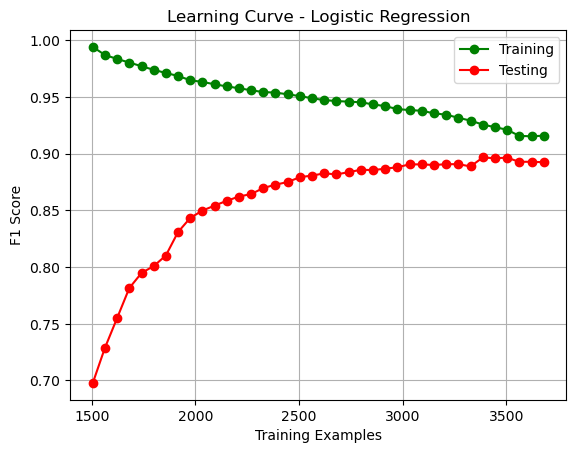

In [15]:
from sklearn.model_selection import learning_curve

def draw_learning_curves(X, y, estimator, num_trainings):

    # Start the plot at 1250 training examples - from running multiple times, both curves are straight lines until roughly 1500
    start_training_size = 1250
    train_sizes, train_scores, test_scores = learning_curve(
                                                            estimator=estimator,
                                                            X=X,
                                                            y=y,
                                                            cv=5,
                                                            n_jobs=1,
                                                            train_sizes=np.linspace(start_training_size / len(X), 1.0, num_trainings),
                                                            scoring='f1'
                                                            )
    
    train_score_mean = np.mean(train_scores, axis=1)
    test_score_mean = np.mean(test_scores, axis=1)

    plt.grid()
    plt.plot(train_sizes, train_score_mean, 'o-', color='g', label='Training')
    plt.plot(train_sizes, test_score_mean, 'o-', color='r', label='Testing')
    plt.title('Learning Curve - Logistic Regression')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.show()

# Note: This might take a while to run, especially with a large number of num_trainings
draw_learning_curves(x, y, best_model, num_trainings=50)

#### Confusion Matrix 

The confusion matrix is a matrix that summarises the performance of a machine learning model on a set of test data. 

- The top left represents the TP, true positive 
- The top right represents the FP - false positive 
- The bottom left represents the FN - false negative 
- The bottom right represents the TN - true negative 

Hence for a more accurate model, we expect the values in the FP and FN to be small

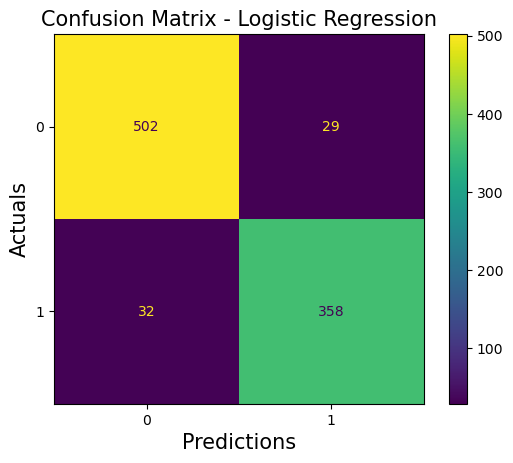

In [6]:
# Confusion Matrix 
confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix)
conf_matrix.plot()
 
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix - Logistic Regression', fontsize=15)
plt.show()

#### ROC Curve (Receiver Operating Characteristic Curve)

This a graph showing the performance of a classification model at all classification thresholds, the curve plots two parameters 

1. *True Positive Rate (TPR)*

$$ TPR = \frac{\text{True Positives }}{\text{ True Positives } + \text{ False Negatives}} $$

2. *False Positive Rate (FPR)*

$$ FPR = \frac{\text{False Positives }}{\text{ False Positives } + \text{ True Negatives}} $$


**Further Resources:**
- https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc


/Users/ejallen/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


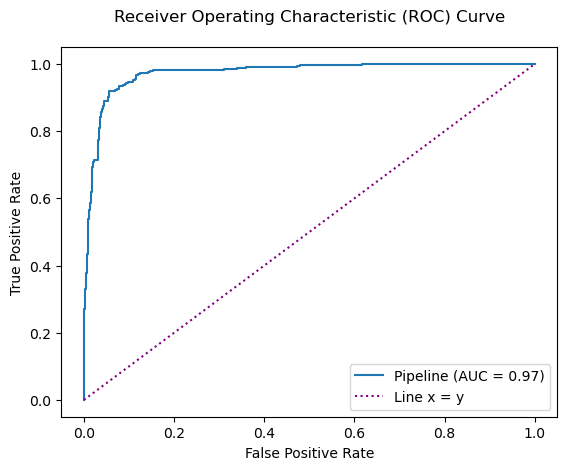

In [7]:
from sklearn import metrics

metrics.RocCurveDisplay.from_estimator(estimator=best_model, X=x_test, y=y_test)

# superimposed diagonal line for comparison
x_line = np.linspace(0, 1, 100)
plt.plot(x_line, x_line, label='Line x = y', color='purple', linestyle='dotted')

plt.title('Receiver Operating Characteristic (ROC) Curve\n')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Area Under the ROC Curve (AUC)

The AUC measures the whole two-dimenstional area underneath the ROC curve, it ranges form 0.0 to 1.0
The provides a measure of performance across all classification thresholds. It can be 
interpreted as the probability that the model ranks a random positive example more highly that a random negative example
100% wrong would mean an AUC of 0.0 and 100% right would mean an AUC of 1.0. 

Two features of AUC are:

1. *Scale Invariant*
    + it measures how well predictions are ranked rather than their absolute values 
    - sometimes we need well calibrated probability outputs and the AUC will not tell us about this 

<p> <!-- Paragraph break --></p>

2. *Classification- Threshold invariant:*
    + it measures the quality of the model's predictions irrespective of what classification threshold is chosen 
    - this is not always desirable, especially in cases where there are wide disparities in the cost of false negative vs false positives. 

<p> <!-- Paragraph break --></p>

**Further Resources:**
- https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

In [8]:
# Compute ROC curve and AUC
y_probs = best_model.predict_proba(x_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_probs)

print(f'The Area under the ROC Curve (AUC) is {auc_roc}')

The Area under the ROC Curve (AUC) is 0.9734270124100632


/Users/ejallen/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


#### Matthews Correlation Coefficient (MCC) 

- The Matthews Correlation Coefficient (MCC) is a metri that takes into account all four values in the confusion matrix to 
provide a balanced measure of the classification performance 
- It ranges from -1 to 1, where 1 indicates a perfect prediction, 0 represents no better than random and -1 indicates total disagreement between prediction and observation
- Formula is given by:

$$ \text{MCC} = \frac{\text{TP} \times \text{TN} - \text{FP} \times \text{FN}}{\sqrt{(\text{TP} + \text{FP}) \times (\text{TP} + \text{FN}) \times (\text{TN} + \text{FP}) \times (\text{TN} + \text{FN})}} $$



In [9]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f'the Matthews Correlation Coefficient is {mcc}')


the Matthews Correlation Coefficient is 0.8642366728301406


#### Cohen's Kappa

Cohen's Kappa is used to evaulate the agreement between the predicted and true class while account for the possibiilty of agreement occuring by chance. This is particularly useful for imbalanced datasets. It is calculated by:


$$\kappa = \frac{P_o - P_e}{1 - P_e}$$

Where:
- $P_o$ is the observed agreement
- $P_e$ is the expected agreement by chance.

Resources:
- https://en.wikipedia.org/wiki/Cohen%27s_kappa
- https://thenewstack.io/cohens-kappa-what-it-is-when-to-use-it-and-how-to-avoid-its-pitfalls/


In [10]:
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa}")

Cohen's Kappa: 0.864217402968409
